# Flight Price Prediction	


## Importing Libraries

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Exploration and Preprocessing

In [112]:
# Loading the Dataset
# Since data is in form of excel file we have to use pandas read_excel to load the data.
df=pd.read_excel("Data_Train_Flight.xlsx")

# To display all the columns present in the dataset
pd.set_option('display.max_columns',None)

# Printing the first 5 rows of the dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Task:
- Our task is to predict the Flight Fare.

In [113]:
# Checking the number of rows and columns in the dataset
df.shape

(10683, 11)

- In our dataset, we have 10683 rows and 11 columns including our target variable "Price".

In [114]:
# Getting dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- We see that all the independent variables are of string datatype.
- Target variable price is of integer datatype.
- Also we see some null values in the dataset.

In [115]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

- We have data of total 12 Airlines. 
- There is a majority of Jet Airways flight.

### Checking and Treating Missing values

In [116]:
# checking the null value counts
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- As we can see we have two null values in our dataset. Our dataset is huge so we can drop these two null values.

In [117]:
# Dropping the null values from our dataset
df.dropna(inplace=True)

In [118]:
# Checking missing value counts afters dropping null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- Great! The null values are dropped now!

### Creation of New Attributes from the Existing Columns

In [119]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### 1. Date_of_Journey

In [120]:
# Date_of_Journey - It is in object type and we need to convert it to datetime and then extract day, month and year out of it
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.year

- Let's check the newly added columns!

In [121]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [122]:
# checking the value count for Journey_Year
df["Journey_Year"].value_counts()

2019    10682
Name: Journey_Year, dtype: int64

In [123]:
# Since we have converted Date_of_Journey column into integers, now we can drop as it is of no use. 
# Also, Journey_Year has only one value that is 2019, so we can drop it too.
df.drop(["Date_of_Journey","Journey_Year"],axis=1,inplace=True)

#### 2. Dep_Time

In [124]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time.
df["Dep_Hour"]=pd.to_datetime(df.Dep_Time).dt.hour
df["Dep_Minute"]=pd.to_datetime(df.Dep_Time).dt.minute

In [125]:
# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"],axis=1,inplace=True)

# printing the first 5 rows after adding departure hours and minutes column
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


#### 3. Arrival_Time

In [126]:
# Arrival time is when the plane pulls up to the gate. 
# # Similar to Date_of_Journey we can extract values from Arrival_Time.
df["Arrival_Hour"]=pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_Minute"]=pd.to_datetime(df.Arrival_Time).dt.minute

In [127]:
# Now we can drop Dep_Time as it is of no use
df.drop(["Arrival_Time"],axis=1,inplace=True)

# printing the first 5 rows after adding arrival hours and minutes column
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


#### 4. Duration

Duration is the difference between Departure Time and Arrival Time.

In [128]:
duration=list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:              # Check if duration contains only hours or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"   # Adds 0 minute
        else:
            duration[i]="0h "+duration[i]           # Adds 0 hour
            
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))            # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))    # Extract minutes from duration

In [129]:
# Adding duration_hours and duration_mins lists to df dataframe
df["Duration_hours"]=duration_hours
df["Duration_mins"]=duration_mins

In [130]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [131]:
# Dropping the Duration column
df.drop(["Duration"],axis=1,inplace=True)

In [132]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Exploratory Data Analysis

### A] Univariate Analysis

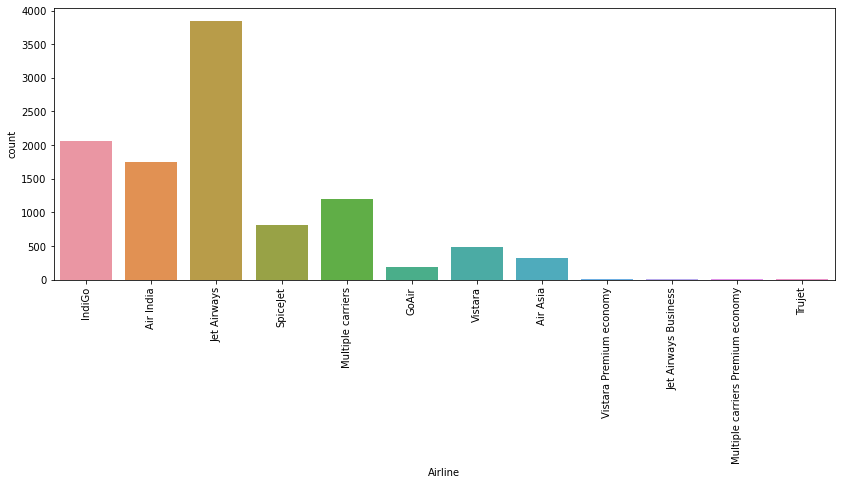

In [133]:
# Airline
plt.figure(figsize=(14,5))
sns.countplot(df["Airline"])
plt.xticks(rotation=90);

#### Observation:
- People mostly prefer Jet Airways, Indigo and Air India Airlines. 
- Very few people travel by Trujet, Vistara Premium economy, Jet Airways Business and Multiple carriers Premium economy.

<AxesSubplot:xlabel='Source', ylabel='count'>

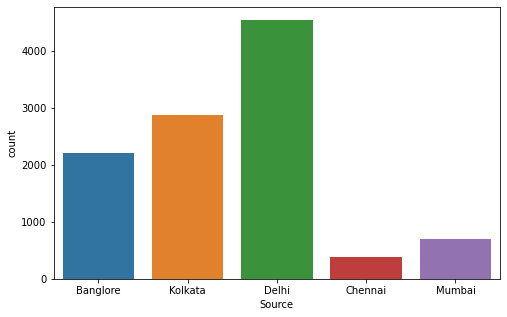

In [134]:
# Source
plt.figure(figsize=(8,5))
sns.countplot(df["Source"])

#### Observation:
- For majority of the people Source location is Delhi.

<AxesSubplot:xlabel='Destination', ylabel='count'>

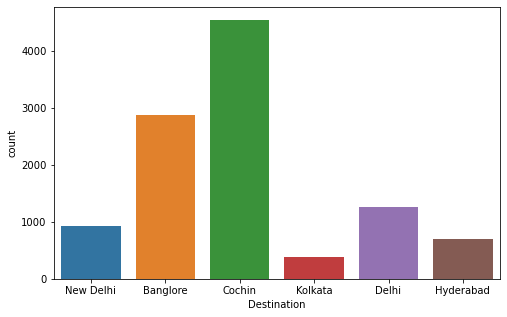

In [135]:
# Destination
plt.figure(figsize=(8,5))
sns.countplot(df["Destination"])

#### Observation:
- For majority of the people Destination location is Cochin.

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

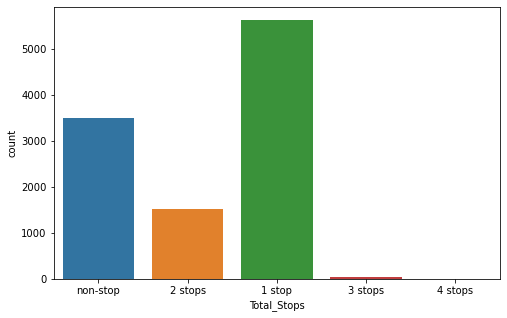

In [136]:
# Total_Stops
plt.figure(figsize=(8,5))
sns.countplot(df["Total_Stops"])

#### Observation:
- Majority of the people prefer 1 stop flights.

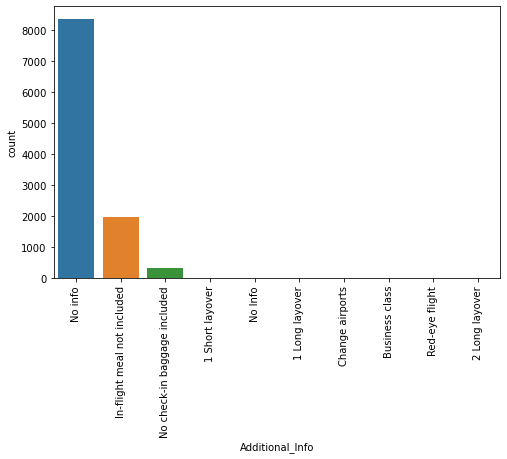

In [137]:
# Additional_Info
plt.figure(figsize=(8,5))
sns.countplot(df["Additional_Info"])
plt.xticks(rotation=90);

#### Observation:
- For 80% of the entries we don't have Additional info.
- For around 2000 people in-flight meal is not included.

### B] Bivariate Analysis

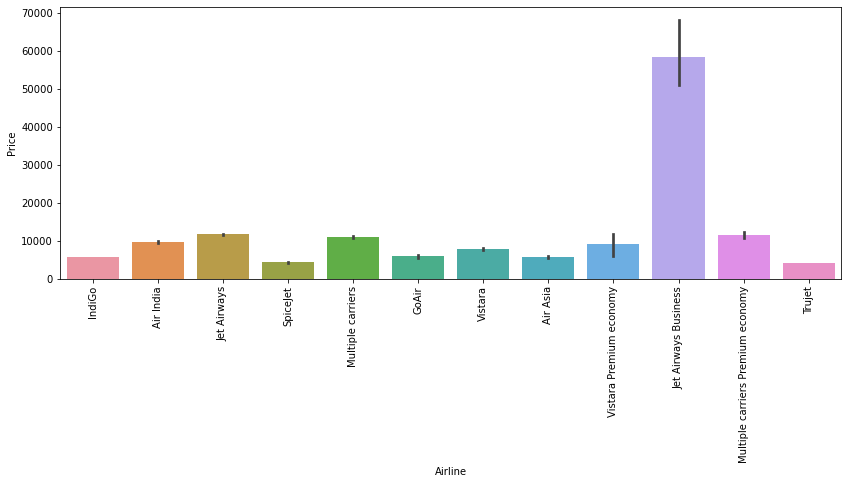

In [138]:
# Airline vs Price
plt.figure(figsize=(14,5))
sns.barplot(x="Airline",y="Price",data=df)
plt.xticks(rotation=90);

#### Observation:
- Though number of flights of Jet Airways, and Indigo is high, however, the flight fare is highest for Jet Airways Business.

<AxesSubplot:xlabel='Source', ylabel='Price'>

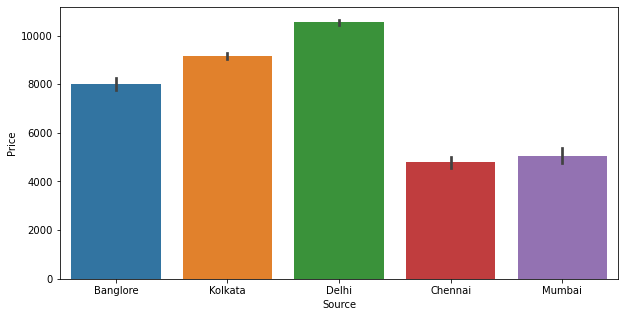

In [139]:
# Source vs Price
plt.figure(figsize=(10,5))
sns.barplot(x="Source",y="Price",data=df)

#### Observation:
- Flight fares for Delhi source location is highest.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

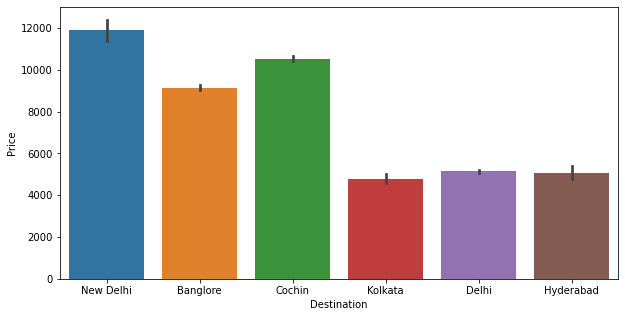

In [140]:
# Destination vs Price
plt.figure(figsize=(10,5))
sns.barplot(x="Destination",y="Price",data=df)

#### Observation:
- The fight fare is high for the destinations New Delhi, Bangalore, Cochin.

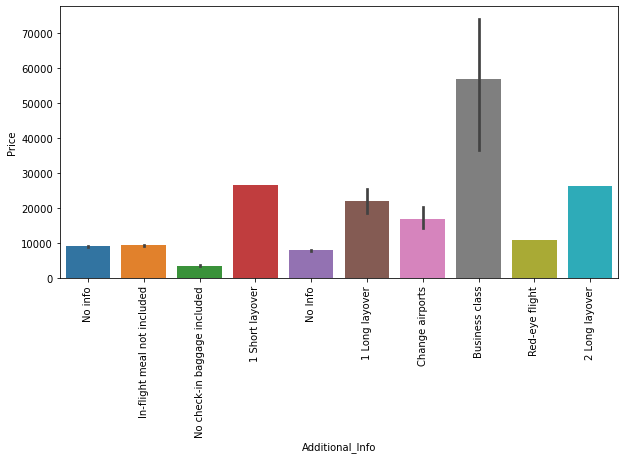

In [141]:
# Additional_Info vs Price
plt.figure(figsize=(10,5))
sns.barplot(x="Additional_Info",y="Price",data=df)
plt.xticks(rotation=90);

#### Observation:
- Business Class flights fare is highest.
- Fights with no check-in baggage have least fare.

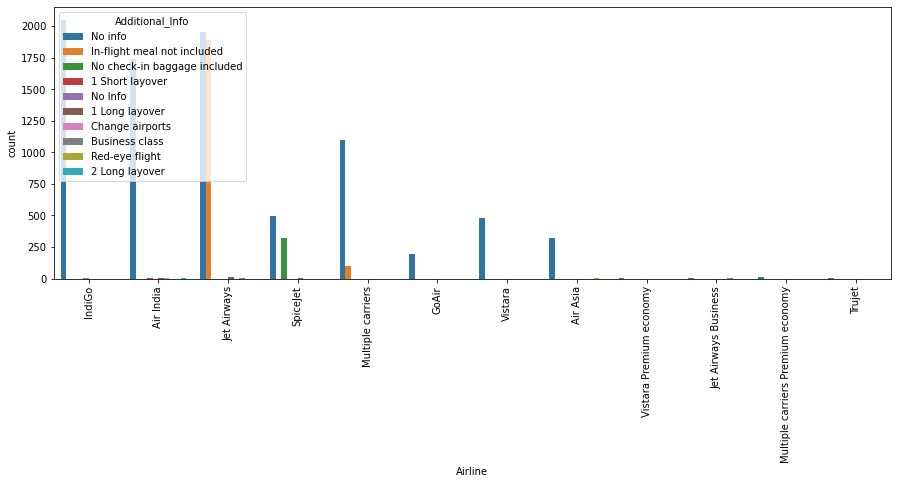

In [142]:
# Additional_Info vs Airline
plt.figure(figsize=(15,5))
sns.countplot(x="Airline",hue="Additional_Info",data=df)
plt.xticks(rotation=90);

#### Observation:
- For majority of the Airlines we don't have additional information.

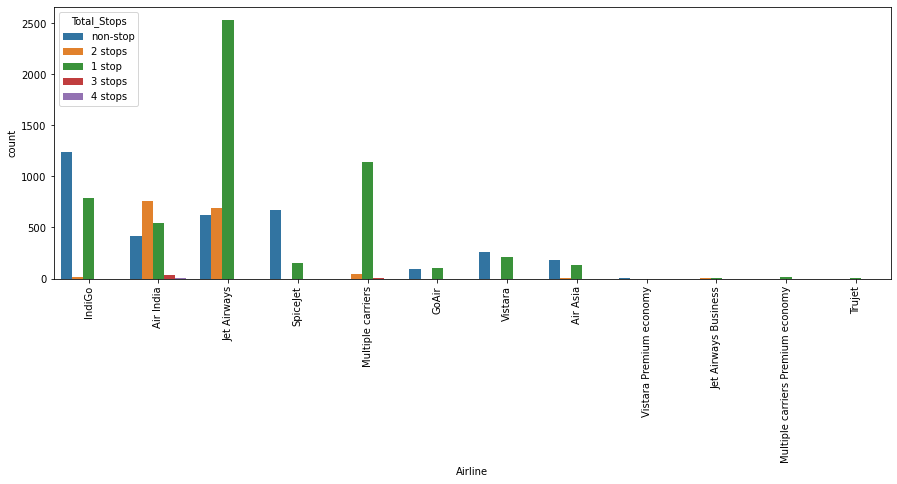

In [143]:
# Airline vs Total_Stops
plt.figure(figsize=(15,5))
sns.countplot(x="Airline",hue="Total_Stops",data=df)
plt.xticks(rotation=90);

#### Observation:
- Indigo Airlines has highest number of non-stop and 1 stop flights.
- Jet Airways and Multiple carriers has highest number of 1 stop flights.
- Air India Airlines has highest number of 2 stop flights.

## Handling Categorical Data

- For Nominal Data, we will use OneHotEncoder
- For Ordinal Data, we will use LabelEncoder

#### 1. Airline

In [144]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [145]:
# As Airlines is Nominal categorical data we will perform OneHotEncoding
Airline=df[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=False)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


#### 2. Source

In [146]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [147]:
# Source is also a Nominal categorical data we will perform OneHotEncoding
Source=df[["Source"]]
Source=pd.get_dummies(Source,drop_first=False)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


#### 3. Destination

In [148]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [149]:
# As Destination is also a Nominal category, we will use OneHotEncoder
Destination=df[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=False)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


#### 4. Route 

- Route and Total_Stops are related to each other.
- Let's drop this columns.

In [150]:
df.drop(["Route"],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### 5. Additional_info

In [151]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [152]:
# We have observed that Additional_Info is a ordinal category
df["Additional_Info"]=df["Additional_Info"].replace(["No info","No Info"],1)
df["Additional_Info"]=df["Additional_Info"].replace(["2 Long layover","1 Short layover"],6)
df.replace({"Business class":7,"1 Long layover":5,"Change airports":4,"Red-eye flight":3,"In-flight meal not included":2,"No check-in baggage included":0},inplace=True)

#### 6. Total_Stops

In [153]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [154]:
# As Total_Stops is a Ordinal Categorical data we will perform LabelEncoder
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,1,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,1,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,1,13302,1,3,16,50,21,35,4,45


In [155]:
# Concatenate Dataframes --> df,Airline,Source,Destination
df=pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,1,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,1,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,1,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### Dropping the Unwanted Columns

In [156]:
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
df.head()

,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,1,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [157]:
df.shape

(10682, 34)

### Correlation Matrix

<AxesSubplot:>

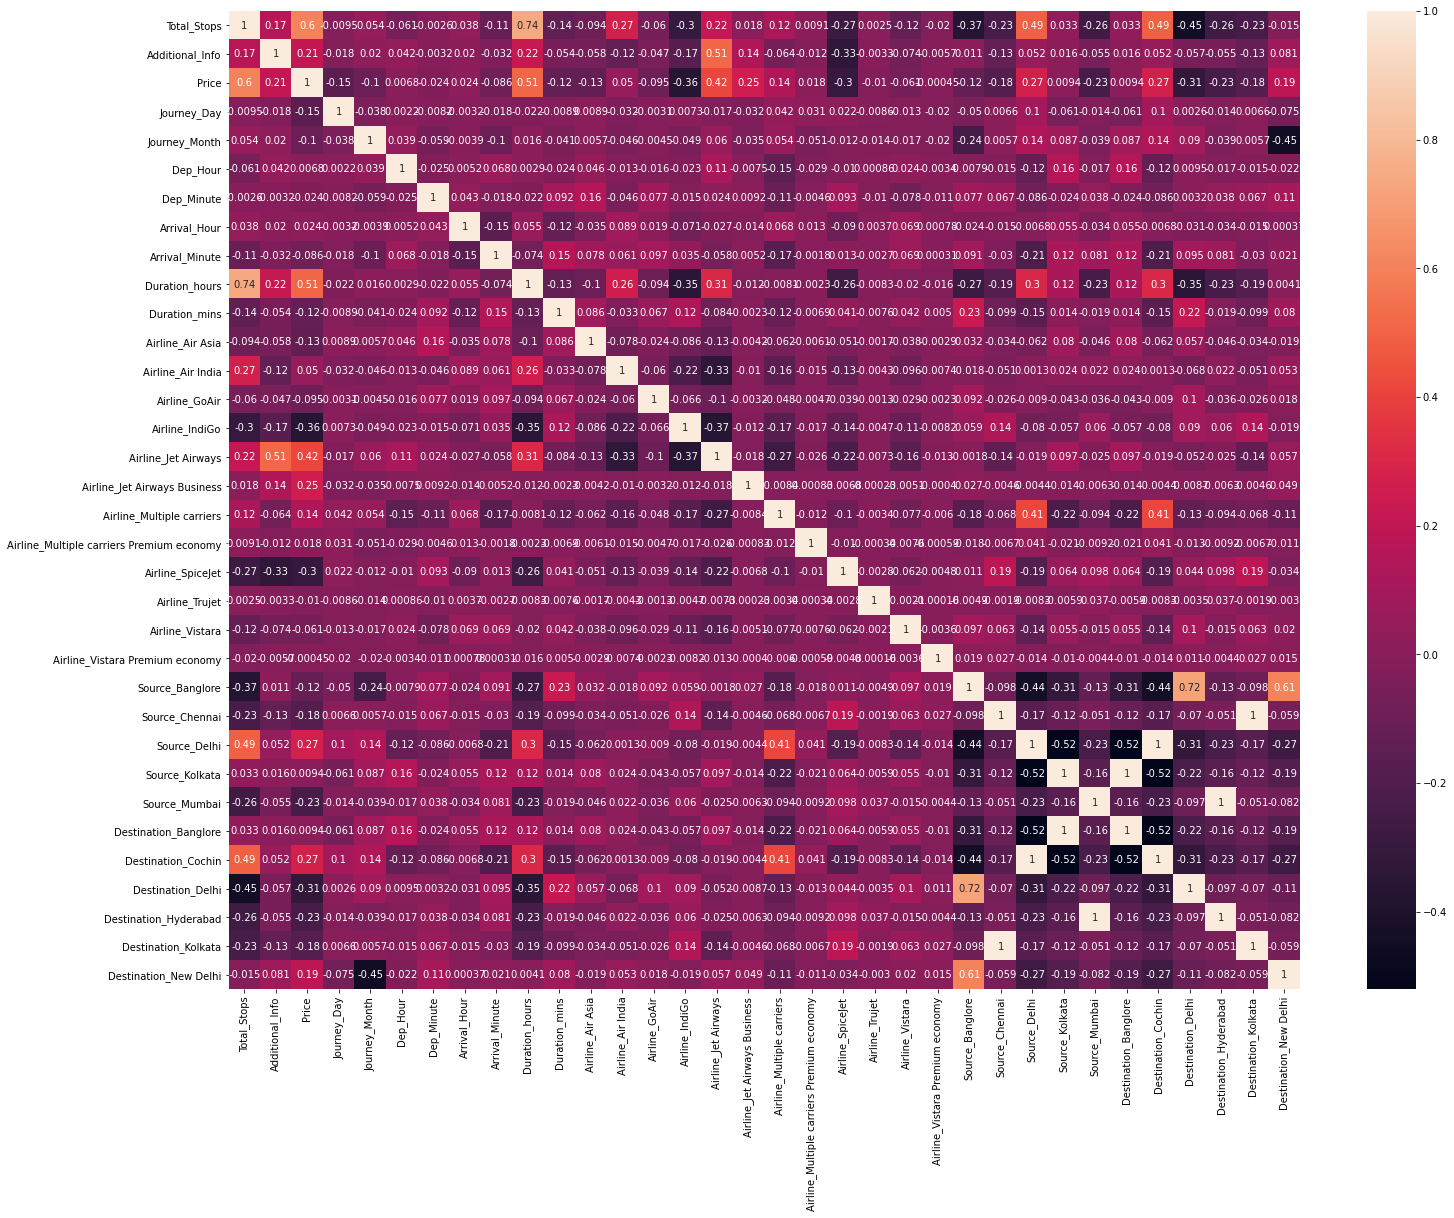

In [158]:
# checking correlation
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True)

#### Observations:
- Target variable "Price" is highly correlated with Total_Stops, Duration_hours, Airline_Jet Airways, Source_Delhi, Destination_Cochin. 
- Its least correlated with Dep_Hour, Airline_Multiple carriers Premium economy, Airline_Vistara Premium economy, Source_Kolkata.
- We see that many independent variables are highly correlated with eaach other, they are:
 - Desctionation_Kolkata - Source_Chennai
 - Destination_Cochin - Source_Delhi
 - Destination_Hyderabad - Source_Mumbai
 - Duration_Hours - Total_Stops
 - Source_Delhi - Total_Stops
 - Destination_Cochin - Total_Stops
- These high correlation between indepedent variables may cause multicollinearity problem, this may impact our model performance.

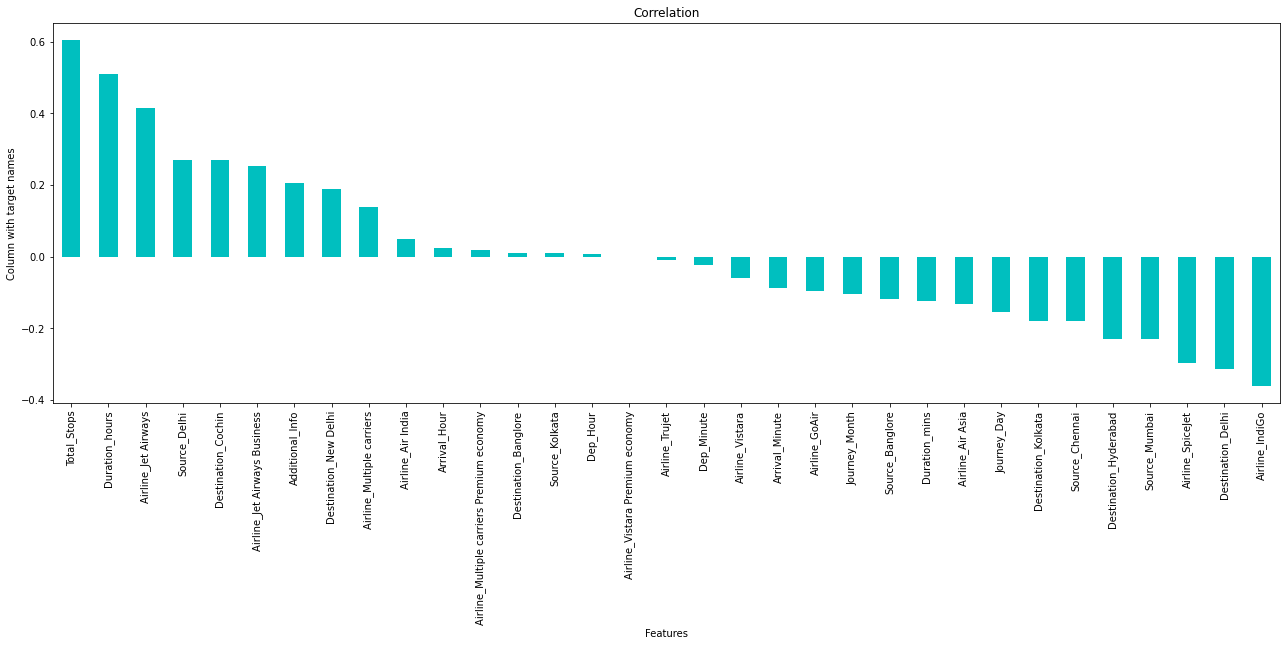

In [159]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

#### Observation:
- From this graph its clear that Total_Stops and Duration_Hours are highly correlated with Price. 
- Airline_Vistara Premium economy, Dep_Hour are least correlated with Price.

### Outliers

- As all our independent variables were categorical and object type, there are no chances of having outliers in the dataset. Hence, outliers are not checked.

### Creating X an Y Split¶

In [160]:
# Splitting data into X and Y
x=df.drop(columns=["Price"],axis=1)
y=df["Price"]

### Scaling

In [161]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_scaled=SS.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

## Building the Model

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Finding Best Random_State

In [163]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.6997051996277941  on Random State  195


- Using the best Random State to create new train_test_split.

In [164]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [165]:
#Importing the algorithmns to build models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


#### 1. LinearRegression

Mean absolute error: 1844.836244981222
Mean squared error: 7539945.554936564
Root Mean squared error: 2745.8961296699777
R2 Score: 0.6573866718778643


<AxesSubplot:title={'center':'Model Coeficients'}>

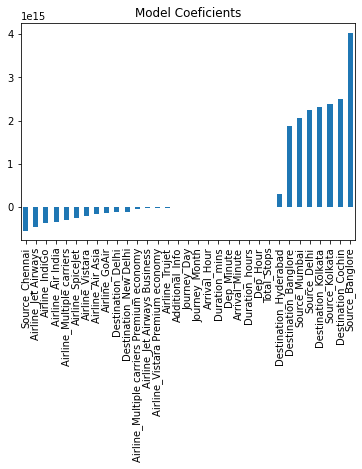

In [166]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

#### 2. RandomForestRegressor

Mean absolute error: 658.4567063236556
Mean squared error: 1944439.167187204
Root Mean squared error: 1394.431485296859
R2 Score: 0.9116451478930279


<AxesSubplot:title={'center':'Feature Importance'}>

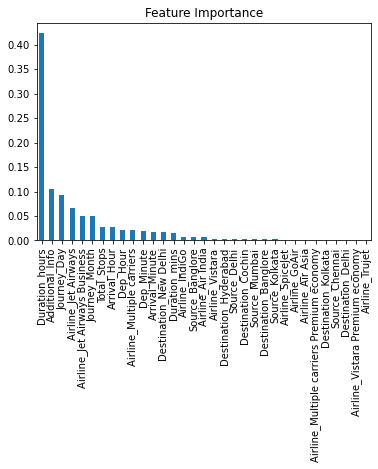

In [167]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 3. XGBRegressor

Mean absolute error: 727.707818860606
Mean squared error: 2060134.601759105
Root Mean squared error: 1435.3168994194643
R2 Score: 0.9063879749335675


<AxesSubplot:title={'center':'Feature Importance'}>

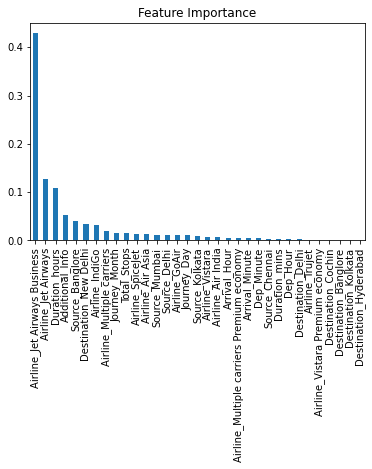

In [168]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(XGB.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 4. DecisionTreeRegressor

Mean absolute error: 759.1446697867916
Mean squared error: 3315208.623262264
Root Mean squared error: 1820.7714363044759
R2 Score: 0.849357710667893


<AxesSubplot:title={'center':'Feature Importance'}>

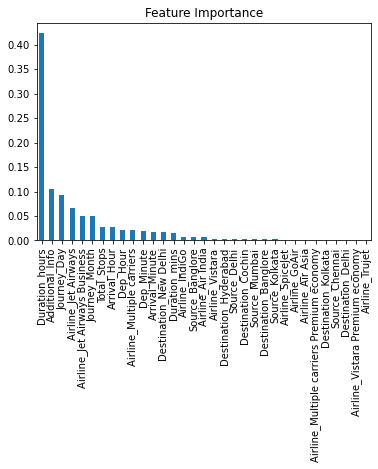

In [169]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

- Here, we observe that RandomForestRegressor is giving the highest r2 score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [170]:
from sklearn.model_selection import cross_val_score

In [171]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

-2.4746308519729095e+19


In [172]:
print(cross_val_score(RFR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.8932505857938345


In [173]:
print(cross_val_score(XGB,x,y,cv=5).mean()) #cross validation for LinearRegression

0.9043024985999825


In [174]:
print(cross_val_score(DTR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.8236917158807604


- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

## Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the r2 score.

In [175]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [176]:
parameters={'criterion':['mse','mae'],
            'max_features':['auto','log2','sqrt'],
            'min_samples_split':[2,3,4,5,6,7]}

In [177]:
GCVRFR=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCVRFR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [178]:
GCVRFR.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_split': 2}

In [179]:
Final_modRFR=RandomForestRegressor(criterion='mse',min_samples_split=2,max_features='auto')
Final_modRFR.fit(x_train,y_train)
pred=Final_modRFR.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

91.06996529342469


- After Hyper Parameter tuning, the improved score of the best model SVC is 91.06%

## Saving the Model

In [181]:
import joblib
joblib.dump(Final_modRFR,"Flight_Price.pkl")

['Flight_Price.pkl']